In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
import numpy as np
from bootstrap_utils import bootstrap_error_estimate, get_kendall_tau, get_pearson_r, get_spearman_rho, get_fraction_withing_1_log
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Initialize a dictionary to store the bootstrapped error estimates
bootstrap_results = {'Log Range': [], 'Kendall Tau': [], 'Pearson r': [], 'Spearman rho': [], 'R2': [],'N': [], 'RMSE': [], 'MAE': [], 'Fraction within 1 log': []}
df_vps = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/group_talk_19_09_2024/vapor_pressures_naef_opera_duplicates.csv')
#get the bootstrapped error estimates for the different metrics, over the different log ranges
for i in range(-12, 10, 1):
    df_tmp = df_vps[(df_vps['VP OPERA'] >= i) & (df_vps['VP OPERA'] < i+3)]
    if len(df_tmp) > 5:
        kendall_result = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, get_kendall_tau,method_name="get_kendall_tau")
        pearson_result = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, get_pearson_r,method_name="get_pearson_r")
        spearman_result = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, get_spearman_rho,method_name="get_spearman_rho")
        r2_result = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, r2_score,method_name="r2_score")
        rmse_result = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, root_mean_squared_error,method_name="root_mean_squared_error")
        mae_result = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, mean_absolute_error,method_name="mean_absolute_error")
        fraction_result = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, get_fraction_withing_1_log,method_name="get_fraction_withing_1_log")
    
        #assert all have no nans, else continue
        if np.isnan(kendall_result[0]) or np.isnan(pearson_result[0]) or np.isnan(spearman_result[0]) or np.isnan(r2_result[0]):
            continue

        # Save the results for plotting later
        bootstrap_results['Log Range'].append(f'{i}-{i+3}')
        bootstrap_results['Kendall Tau'].append(kendall_result)
        bootstrap_results['Pearson r'].append(pearson_result)
        bootstrap_results['Spearman rho'].append(spearman_result)
        bootstrap_results['R2'].append(r2_result)
        bootstrap_results['N'].append(len(df_tmp))
        bootstrap_results['RMSE'].append(rmse_result)
        bootstrap_results['MAE'].append(mae_result)
        bootstrap_results['Fraction within 1 log'].append(fraction_result)
        

# Convert the results to a DataFrame for easier plotting
bootstrap_df = pd.DataFrame(bootstrap_results)
bootstrap_df.head()

,Log Range,Kendall Tau,Pearson r,Spearman rho,R2,N,RMSE,MAE,Fraction within 1 log
0,-11--8,"(0.0, 0.7334782608695651, 0.26967994498529685)","(0.0, 0.9679446012234557, 0.4395503715124071)","(0.0, 0.8590127686267569, 0.4559291577600484)","(0.0, -0.3406009201308831, -1.8450464415230146)",10,"(1.8886707672710712, 3.6029399794481014, 2.691...","(1.7347837720518164, 3.2509298152009802, 2.424...","(0.0, 0.4444444444444444, 0.2)"
1,-10--7,"(0.0, 0.6551724137931034, 0.26890756302521013)","(0.0, 0.7444663743360653, 0.3543996974711039)","(0.0, 0.8492532040851286, 0.4050073637702503)","(0.0, -0.1666618743399324, -1.6512484546614772)",16,"(1.6548765425642136, 3.035906581309085, 2.2976...","(1.369563367816309, 2.6302499687542964, 1.9682...","(0.07142857142857142, 0.5, 0.25)"
2,-9--6,"(0.0, 0.5523080092616474, 0.2545454545454545)","(0.0, 0.6904970118797694, 0.32216964831905165)","(0.0, 0.7295753486424683, 0.33188342757720746)","(0.0, -0.6521317947812942, -1.6909895407390696)",24,"(1.5625385479994789, 2.8663377876346443, 2.195...","(1.2001248500742898, 2.3506328280012507, 1.760...","(0.09523809523809523, 0.47619047619047616, 0.2..."
3,-8--5,"(0.17299224046588957, 0.6838255055464781, 0.44...","(0.15057360918770343, 0.819745087157159, 0.555...","(0.18905628861924514, 0.8398427244236776, 0.56...","(0.0, 0.007373874764055908, -0.7010214625406541)",33,"(1.276875492838827, 2.1127150434842235, 1.6648...","(1.0427321933724614, 1.7261249525070883, 1.369...","(0.1724137931034483, 0.5172413793103449, 0.333..."
4,-7--4,"(0.0, 0.4479433889749857, 0.22651152946206823)","(0.0, 0.5817894284224883, 0.2819598979062829)","(0.0, 0.5965194757850717, 0.30386740726836325)","(0.0, -0.045709179751561045, -0.588419020322432)",53,"(1.212749120627762, 1.815797393977313, 1.48987...","(1.0060645013982707, 1.4753667850415288, 1.236...","(0.23404255319148937, 0.5106382978723404, 0.35..."


/tmp/ipykernel_1870955/4140840862.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', 256)
/tmp/ipykernel_1870955/4140840862.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bootstrap_df_mae[['Lower', 'Upper', 'Mean']] = pd.DataFrame(bootstrap_df_mae['MAE'].tolist(), index=bootstrap_df_mae.index)
/tmp/ipykernel_1870955/4140840862.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

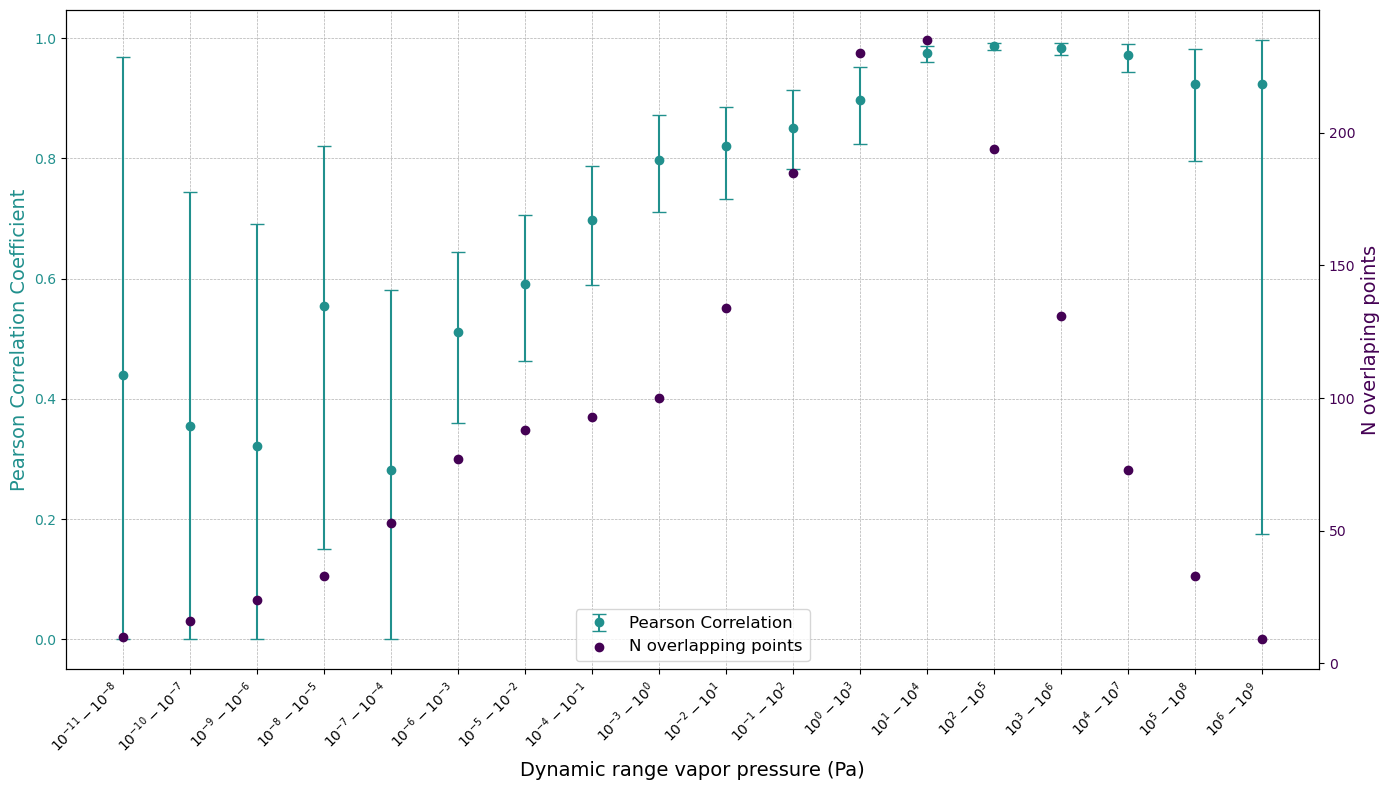

In [5]:
import matplotlib.cm as cm
colors = cm.get_cmap('viridis', 256)
colors = colors(np.linspace(0, 1, 256))
colors = colors[:128]
colors = colors[::-1]
c1 = colors[0]
c2 = colors[-1]
# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(14, 8))
bootstrap_df_mae = bootstrap_df[['Log Range', 'MAE','N']]
bootstrap_df_mae[['Lower', 'Upper', 'Mean']] = pd.DataFrame(bootstrap_df_mae['MAE'].tolist(), index=bootstrap_df_mae.index)
bootstrap_df_mae = bootstrap_df_mae.dropna()
log_ranges = bootstrap_df_mae['Log Range']
# long_ranges_new = [(-int(i.split('-')[1]), int(i.split('-')[3])) for i in log_ranges if len(i.split('-')[0]) == 1 else (int(i.split('-')[0]), int(i.split('-')[1]))]
long_ranges_new = []
for l in log_ranges:
    if len(l.split('-')) == 4:
        long_ranges_new.append((-int(l.split('-')[1]), -int(l.split('-')[3])))
    elif len(l.split('-')) == 3:
        long_ranges_new.append((-int(l.split('-')[1]), int(l.split('-')[2])))
    else:
        long_ranges_new.append((int(l.split('-')[0]), int(l.split('-')[1])))
long_ranges = long_ranges_new

#also do pearson
bootstrap_df_pearson = bootstrap_df[['Log Range', 'Pearson r','N']]
bootstrap_df_pearson[['Lower', 'Upper', 'Mean']] = pd.DataFrame(bootstrap_df_pearson['Pearson r'].tolist(), index=bootstrap_df_pearson.index)
bootstrap_df_pearson = bootstrap_df_pearson.dropna()
lb = bootstrap_df_pearson['Mean'] - bootstrap_df_pearson['Lower']
ub = bootstrap_df_pearson['Upper'] - bootstrap_df_pearson['Mean']

ax1.errorbar(
    bootstrap_df_pearson['Log Range'],
    bootstrap_df_pearson['Mean'],
    yerr=[lb, ub],
    fmt='o',
    capsize=5,
    color=c1,
    label='Pearson Correlation'
)

# Customize the first axis
ax1.set_xlabel('Dynamic range vapor pressure (Pa)', fontsize=14)
ax1.set_ylabel('Pearson Correlation Coefficient', fontsize=14, color=c1)
ax1.tick_params(axis='y', labelcolor=c1)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(visible=True, linestyle='--', linewidth=0.5)

# Customize x-tick labels with scientific notation
long_ranges_lower = [l[0] for l in long_ranges_new]
log_ranges_upper = [l[1] for l in long_ranges_new]
xtick_labels = [f'$10^{{{lower}}} - 10^{{{upper}}}$' for lower, upper in zip(long_ranges_lower, log_ranges_upper)]

ax1.set_xticks(np.arange(len(log_ranges)))
ax1.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Create the second axis for N
ax2 = ax1.twinx()
ax2.scatter(bootstrap_df_mae['Log Range'], bootstrap_df_mae['N'], color=c2, label='N overlapping points')
# Customize the second axis
ax2.set_ylabel('N overlaping points', fontsize=14, color=c2)
ax2.tick_params(axis='y', labelcolor=c2)

# combine legend and put in lower center
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower center', fontsize=12)

# Set a tight layout for better spacing
plt.tight_layout()

#save
plt.savefig('Pearson_bootstrap_N.png', dpi=800)

# Display the plot
plt.show()

In [6]:
def check_results_in_db(conn, descriptor, model_name, seed):
    query = """
    SELECT y_true, y_pred, molregno FROM cs_mdfps_schema.model_descriptor_results 
    WHERE descriptor=%s AND model=%s AND seed=%s
    """
    cur = conn.cursor()
    cur.execute(query, (descriptor, model_name, seed))
    results = cur.fetchone()
    cur.close()
    return results

import psycopg2
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=lebanon")
descriptor = 'RDKit_PhysChem'
models_to_evaluate = ['MultilinearRegression', 'RidgeRegression', 'Lasso', 'PLS', 'RandomForest', 'XGBoost', 'NeuralNetwork']
predictions_lol, y_list_lol, molregno_list_lol = [], [], []
for model_name in models_to_evaluate:
    predictions, y_list, molregno_list = [], [], []
    for i in range(10):
        result = check_results_in_db(conn, descriptor, model_name, i)
        if result:
            y_true, y_pred, molregno = result
            predictions.append(y_pred)
            y_list.append(y_true)
            molregno_list.append(molregno)
    predictions_lol.append(predictions)
    y_list_lol.append(y_list)
    molregno_list_lol.append(molregno_list)
print(len(predictions), len(y_list), len(molregno_list))
print(len(predictions_lol), len(y_list_lol), len(molregno_list_lol))

10 10 10
7 7 7


In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, matthews_corrcoef

def model_90_ci(pred, truth, method, method_name="", alpha=0.95):
    """
    Calculate confidence intervals for a metric across different dynamic ranges of ground truths.
    :param pred: nested list of predicted values (each sublist corresponds to a fold)
    :param truth: nested list of ground truth values (each sublist corresponds to a fold)
    :param method: method to evaluate performance, e.g., mean_absolute_error, mean_squared_error, matthews_corrcoef
    :param method_name: string representation of the method (for adjusting percentiles)
    :param alpha: confidence level (e.g., 0.95 for 95% confidence interval)
    :return: Dictionary with lower, upper bounds, and median for each range
    """
    
    stats_per_range = {}
    
    for pred_sample, truth_sample in zip(pred, truth):
        pred_sample = np.array(pred_sample)
        truth_sample = np.array(truth_sample)
        for range_start in range(-12, 10, 3):  # Iterate over dynamic ranges of truth
            mask = (truth_sample >= range_start) & (truth_sample < range_start + 3)
            if np.sum(mask) > 5:  # Ensure there are enough data points in the range
                if range_start not in stats_per_range:
                    stats_per_range[range_start] = []
                stats_per_range[range_start].append(method(pred_sample[mask], truth_sample[mask]))

    ci_results = {}
    
    for range_start, stats in stats_per_range.items():
        p_lower = ((1.0 - alpha) / 2.0) * 100
        p_upper = (alpha + ((1.0 - alpha) / 2.0)) * 100
        lower = np.percentile(stats, p_lower)
        upper = np.percentile(stats, p_upper)
        median = np.median(stats)
        
        ci_results[range_start] = {
            'lower': lower,
            'upper': upper,
            'median': median
        }
    
    return ci_results


# Adjusted loop to create a DataFrame with results per model, range, and metric
model_results = {
    'Model': [], 'Range': [], 'Metric': [], 
    'Lower': [], 'Upper': [], 'Median': []
}

for i, model_name in enumerate(models_to_evaluate):
    for method in [r2_score, root_mean_squared_error, mean_absolute_error, get_fraction_withing_1_log, get_kendall_tau, get_pearson_r, get_spearman_rho]:
        range_metrics = model_90_ci(predictions_lol[i], y_list_lol[i], method)
        
        for range_start, stats in range_metrics.items():
            model_results['Model'].append(model_name)
            model_results['Range'].append(f"{range_start} to {range_start + 3}")
            model_results['Metric'].append(method.__name__)
            model_results['Lower'].append(stats['lower'])
            model_results['Upper'].append(stats['upper'])
            model_results['Median'].append(stats['median'])

# Convert the dictionary to a DataFrame
model_results_df = pd.DataFrame(model_results)

# Display the DataFrame
model_results_df.head()

,Model,Range,Metric,Lower,Upper,Median
0,MultilinearRegression,-9 to -6,r2_score,-0.788218,0.393301,0.061727
1,MultilinearRegression,-6 to -3,r2_score,0.002995,0.352214,0.180223
2,MultilinearRegression,-3 to 0,r2_score,0.358805,0.642626,0.505263
3,MultilinearRegression,0 to 3,r2_score,0.608365,0.778274,0.652832
4,MultilinearRegression,3 to 6,r2_score,0.434298,0.754543,0.604271


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from sklearn.utils import resample
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import kendalltau, pearsonr, spearmanr

# Metric functions
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def get_kendall_tau(y_true, y_pred):
    return kendalltau(y_true, y_pred).correlation

def get_pearson_r(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]

def get_spearman_rho(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

def get_fraction_withing_1_log(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)) < 1)

# Bootstrapping function for experimental results
def bootstrap_error_estimate(pred, truth, method, alpha=0.95, sample_frac=0.9, iterations=1000):
    stats = []
    num_samples = int(len(pred) * sample_frac)
    for _ in range(iterations):
        sample_idx = resample(range(len(pred)), n_samples=num_samples)
        pred_sample = [pred[x] for x in sample_idx]
        truth_sample = [truth[x] for x in sample_idx]
        stats.append(method(pred_sample, truth_sample))
    lower = np.percentile(stats, ((1.0 - alpha) / 2.0) * 100)
    upper = np.percentile(stats, (alpha + ((1.0 - alpha) / 2.0)) * 100)
    median = method(pred, truth)
    return lower, upper, median

# Connect to the database
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=lebanon")
descriptor = 'RDKit_PhysChem'
models_to_evaluate = ['Ordinary Least Squares', 'RidgeRegression', 'Lasso', 'PLS', 'RandomForest', 'XGBoost', 'NeuralNetwork']

# Retrieve model results
predictions_lol, y_list_lol = [], []
for model_name in models_to_evaluate:
    predictions, y_list = [], []
    for i in range(10):  # Iterate over 10 splits
        result = check_results_in_db(conn, descriptor, model_name, i)
        if result:
            y_true, y_pred, _ = result
            predictions.append(y_pred)
            y_list.append(y_true)
    predictions_lol.append(predictions)
    y_list_lol.append(y_list)

# Calculate metrics for model results
model_results = {
    'Source': [], 'Model': [], 'Range': [], 'Metric': [],
    'Lower': [], 'Upper': [], 'Median': []
}

for i, model_name in enumerate(models_to_evaluate):
    for method in [r2_score, root_mean_squared_error, mean_absolute_error, get_fraction_withing_1_log, get_kendall_tau, get_pearson_r, get_spearman_rho]: mean_absolute_error, get_fraction_withing_1_log, get_kendall_tau, get_pearson_r, get_spearman_rho]:
        range_metrics = model_90_ci(predictions_lol[i], y_list_lol[i], method)
        
        for range_start, stats in range_metrics.items():
            model_results['Source'].append('Model')
            model_results['Model'].append(model_name)
            model_results['Range'].append(f"{range_start} to {range_start + 3}")            model_results['Range'].append(f"{range_start} to {range_start + 3}")
            model_results['Metric'].append(method.__name__)lts['Metric'].append(method.__name__)
            model_results['Lower'].append(stats['lower'])s['lower'])
            model_results['Upper'].append(stats['upper'])            model_results['Upper'].append(stats['upper'])
            model_results['Median'].append(stats['median'])['median'])

# Convert to DataFrame
model_results_df = pd.DataFrame(model_results)

# Calculate metrics for experimental comparisons
bootstrap_results = {
    'Source': [], 'Model': [], 'Range': [], 'Metric': [],
    'Lower': [], 'Upper': [], 'Median': []
}
df_vps = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/group_talk_19_09_2024/vapor_pressures_naef_opera_duplicates.csv')
for i in range(-12, 10, 3):
    df_tmp = df_vps[(df_vps['VP OPERA'] >= i) & (df_vps['VP OPERA'] < i + 3)]
    if len(df_tmp) > 5:
        for method, method_name in [(get_kendall_tau, 'Kendall Tau'), (get_pearson_r, 'Pearson r'), (get_spearman_rho, 'Spearman rho'), 
                                    (r2_score, 'R2'), (root_mean_squared_error, 'RMSE'), (mean_absolute_error, 'MAE'), 
                                    (get_fraction_withing_1_log, 'Fraction within 1 log')]:
            lower, upper, median = bootstrap_error_estimate(df_tmp['VP Naef&Acree'].values, df_tmp['VP OPERA'].values, method)
            bootstrap_results['Source'].append('Experimental')
            bootstrap_results['Model'].append('Experimental Agreement')
            bootstrap_results['Range'].append(f"{i} to {i + 3}")
            bootstrap_results['Metric'].append(method_name)
            bootstrap_results['Lower'].append(lower)
            bootstrap_results['Upper'].append(upper)
            bootstrap_results['Median'].append(median)

# Convert to DataFrame
experimental_results_df = pd.DataFrame(bootstrap_results)


,Source,Model,Range,Metric,Lower,Upper,Median
0,Model,MultilinearRegression,-9 to -6,r2_score,-0.788218,0.393301,0.061727
1,Model,MultilinearRegression,-6 to -3,r2_score,0.002995,0.352214,0.180223
2,Model,MultilinearRegression,-3 to 0,r2_score,0.358805,0.642626,0.505263
3,Model,MultilinearRegression,0 to 3,r2_score,0.608365,0.778274,0.652832
4,Model,MultilinearRegression,3 to 6,r2_score,0.434298,0.754543,0.604271
...,...,...,...,...,...,...,...
380,Experimental,Experimental Agreement,6 to 9,Spearman rho,-0.135238,1.000000,0.733333
381,Experimental,Experimental Agreement,6 to 9,R2,-7.413066,0.910056,0.780053
382,Experimental,Experimental Agreement,6 to 9,RMSE,0.053354,0.379799,0.256093
383,Experimental,Experimental Agreement,6 to 9,MAE,0.045970,0.316799,0.167441


In [25]:
#rename metrics in model_results_df
model_results_df['Metric'] = model_results_df['Metric'].replace({'r2_score': 'R2', 'root_mean_squared_error': 'RMSE', 'mean_absolute_error': 'MAE', 'get_fraction_withing_1_log': 'Fraction within 1 log', 'get_kendall_tau': 'Kendall Tau', 'get_pearson_r': 'Pearson r', 'get_spearman_rho': 'Spearman rho'})


# Combine DataFrames
combined_df = pd.concat([model_results_df, experimental_results_df], ignore_index=True)
combined_df['Metric'].value_counts()

Metric
R2                       55
RMSE                     55
MAE                      55
Fraction within 1 log    55
Kendall Tau              55
Pearson r                55
Spearman rho             55
Name: count, dtype: int64

In [35]:
#change multilinear regression to ordinary least squares
combined_df['Model'] = combined_df['Model'].replace({'MultilinearRegression': 'Ordinary Least Squares'})

/tmp/ipykernel_1870955/3884692599.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', 256)


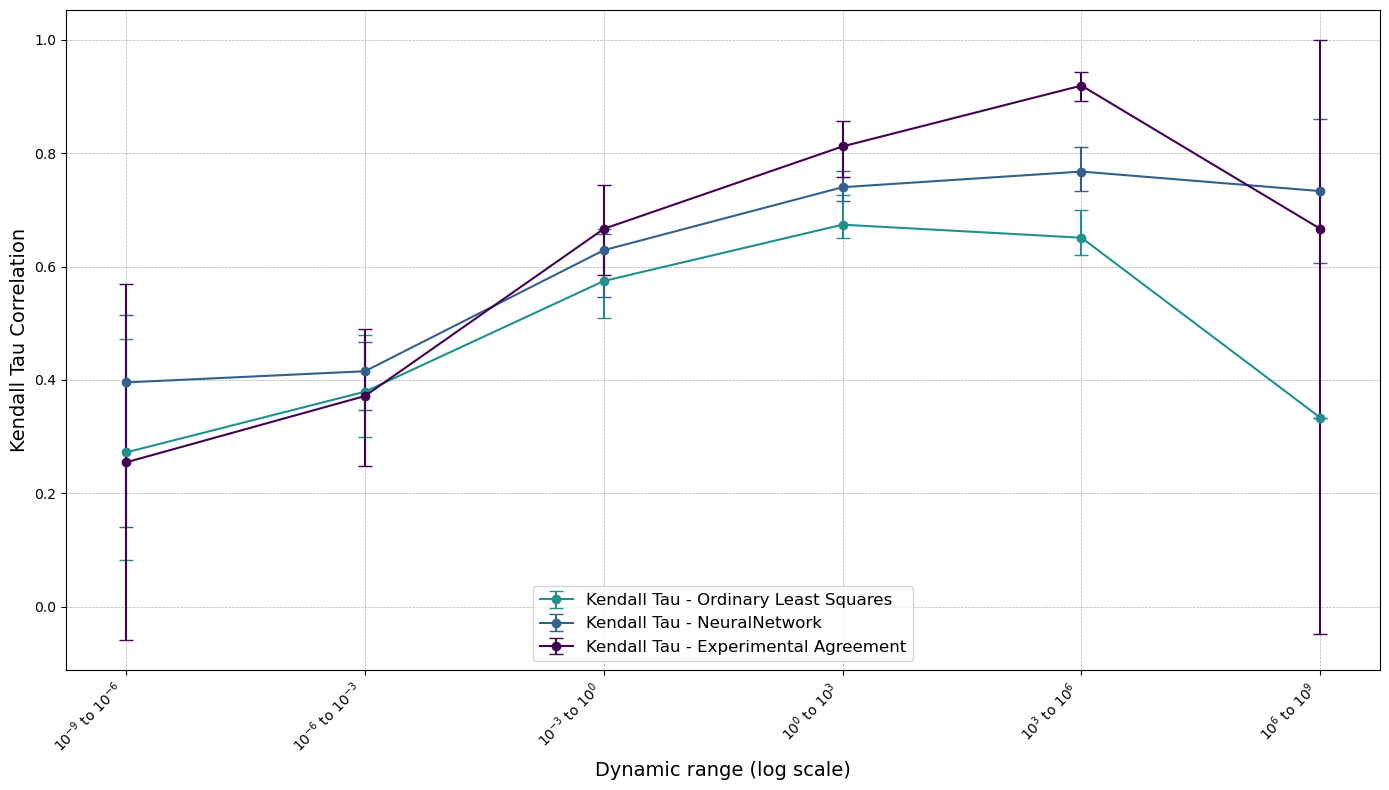

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
combined_df['Range Start'] = combined_df['Range'].apply(lambda x: int(x.split(' to ')[0]))
combined_df['Range End'] = combined_df['Range'].apply(lambda x: int(x.split(' to ')[1]))
#drop those with Range start value counts < max value count
max_range_start_value_count = combined_df['Range Start'].value_counts().max()
range_start_value_counts = combined_df['Range Start'].value_counts()
range_start_value_counts = range_start_value_counts[range_start_value_counts == max_range_start_value_count]
combined_df = combined_df[combined_df['Range Start'].isin(range_start_value_counts.index)]

# Sort the DataFrame by the numeric start of the range
combined_df.sort_values(by='Range Start', inplace=True)

#drop nans
combined_df = combined_df.dropna()

# Filter the combined DataFrame for relevant metrics and sources
filtered_df = combined_df[
    (combined_df['Metric'] == 'Kendall Tau') &
    (combined_df['Model'].isin(['Ordinary Least Squares', 'NeuralNetwork', 'Experimental Agreement']))
]

# Set up colors
colors = cm.get_cmap('viridis', 256)
colors = colors(np.linspace(0, 1, 256))
colors = colors[:128][::-1]
c1, c2, c3 = colors[0], colors[50], colors[-1]  # Use distinct colors for each line

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Kendall Tau for each source
sources = ['Ordinary Least Squares', 'NeuralNetwork', 'Experimental Agreement']
colors_map = [c1, c2, c3]
for source, color in zip(sources, colors_map):
    subset = filtered_df[filtered_df['Model'] == source]
    lb = subset['Median'] - subset['Lower']
    ub = subset['Upper'] - subset['Median']

    ax1.errorbar(
        subset['Range'], subset['Median'],
        yerr=[lb, ub],
        fmt='o-', capsize=5, color=color,
        label=f'Kendall Tau - {source}'
    )

# Customize the first axis
ax1.set_xlabel('Dynamic range (log scale)', fontsize=14)
ax1.set_ylabel('Kendall Tau Correlation', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(visible=True, linestyle='--', linewidth=0.5)

# Customize the x-tick labels if needed
log_ranges_lower = [int(r.split(' to ')[0]) for r in filtered_df['Range'].unique()]
log_ranges_upper = [int(r.split(' to ')[1]) for r in filtered_df['Range'].unique()]
xtick_labels = [f'$10^{{{lower}}}$ to $10^{{{upper}}}$' for lower, upper in zip(log_ranges_lower, log_ranges_upper)]

ax1.set_xticks(np.arange(len(log_ranges_lower)))
ax1.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Combine and show legend
ax1.legend(loc='lower center', fontsize=12)

# Set a tight layout
plt.tight_layout()

# Save the plot
plt.savefig('kendall_tau_comparison.png', dpi=800)

# Display the plot
plt.show()


F_onewayResult(statistic=1.467568631683218, pvalue=0.230972888370144)


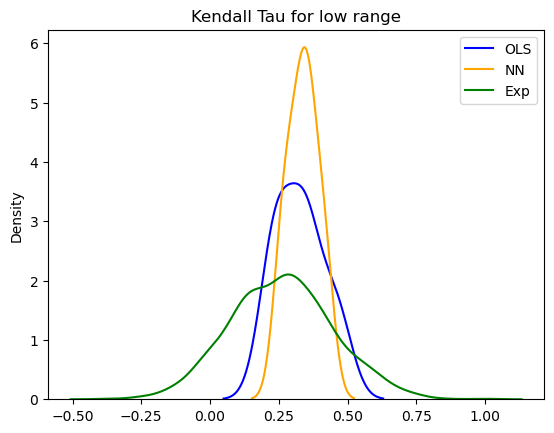

In [39]:
#sample dummy data with same mean and 90% confidence interval for lowest range
np.random.seed(42)
mean_kendall_low_range_ols = combined_df[(combined_df['Model'] == 'Ordinary Least Squares') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Median'].values[0]
lower_ci_kendall_low_range_ols = combined_df[(combined_df['Model'] == 'Ordinary Least Squares') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Lower'].values[0]
upper_ci_kendall_low_range_ols = combined_df[(combined_df['Model'] == 'Ordinary Least Squares') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Upper'].values[0]
mean_kendall_low_range_nn = combined_df[(combined_df['Model'] == 'NeuralNetwork') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Median'].values[0]
lower_ci_kendall_low_range_nn = combined_df[(combined_df['Model'] == 'NeuralNetwork') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Lower'].values[0]
upper_ci_kendall_low_range_nn = combined_df[(combined_df['Model'] == 'NeuralNetwork') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Upper'].values[0]
mean_kendall_low_range_exp = combined_df[(combined_df['Model'] == 'Experimental Agreement') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Median'].values[0]
lower_ci_kendall_low_range_exp = combined_df[(combined_df['Model'] == 'Experimental Agreement') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Lower'].values[0]
upper_ci_kendall_low_range_exp = combined_df[(combined_df['Model'] == 'Experimental Agreement') & (combined_df['Metric'] == 'Kendall Tau') & (combined_df['Range Start'] == -9)]['Upper'].values[0]
#1000 samples for experiment, 10 for the nn and ols
n_samples = 1000
n_samples_nn_ols = 10
samples_ols = np.random.normal(mean_kendall_low_range_ols, (upper_ci_kendall_low_range_ols - mean_kendall_low_range_ols) / 1.645, n_samples_nn_ols)
samples_nn = np.random.normal(mean_kendall_low_range_nn, (upper_ci_kendall_low_range_nn - mean_kendall_low_range_nn) / 1.645, n_samples_nn_ols)
samples_exp = np.random.normal(mean_kendall_low_range_exp, (upper_ci_kendall_low_range_exp - mean_kendall_low_range_exp) / 1.645, n_samples)
#anova
from scipy.stats import f_oneway
print(f_oneway(samples_ols, samples_nn, samples_exp))
#draw
import seaborn as sns
sns.kdeplot(samples_ols, color='blue', label='OLS')
sns.kdeplot(samples_nn, color='orange', label='NN')
sns.kdeplot(samples_exp, color='green', label='Exp')
plt.legend()
plt.title('Kendall Tau for low range')
plt.show()


10 10 10
F_onewayResult(statistic=1.4667804053847322, pvalue=0.24846925311437654)
FriedmanchisquareResult(statistic=3.8000000000000114, pvalue=0.14956861922263423)
WilcoxonResult(statistic=39.0, pvalue=0.1376953125)


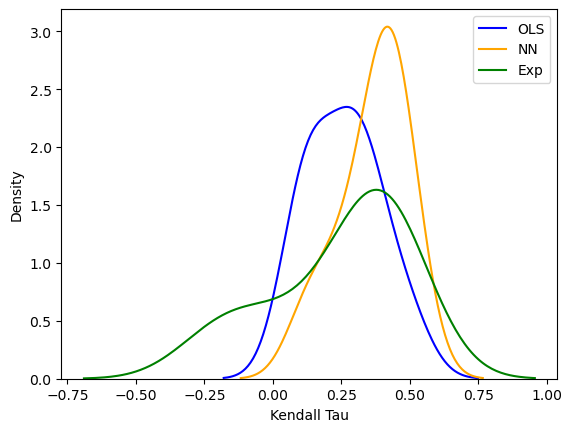

In [58]:
#now get the real values, just for this range
df_tmp = df_vps[(df_vps['VP OPERA'] >= -9) & (df_vps['VP OPERA'] < -6)]
pred = df_tmp['VP Naef&Acree'].values
truth = df_tmp['VP OPERA'].values
index_list = range(0, len(pred))
sample_frac = 0.9
alpha = 0.95
iterations = 10
num_samples = int(len(index_list) * sample_frac)
stats_exp_bootstrap = []
method = get_kendall_tau
for _ in range(0, iterations):
    sample_idx = resample(index_list, n_samples=num_samples)
    pred_sample = [pred[x] for x in sample_idx]
    truth_sample = [truth[x] for x in sample_idx]
    stats_exp_bootstrap.append(method(pred_sample, truth_sample))
descriptor = 'RDKit_PhysChem'
model_name = 'NeuralNetwork'
stats_nn = []
for i in range(10):  # Iterate over 10 splits
    result_nn = check_results_in_db(conn, descriptor, model_name, i)
    if result_nn:
        y_true, y_pred, _ = result_nn
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        mask = (y_true >= -9) & (y_true < -6)
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        stats_nn.append(method(y_pred, y_true))
descriptor = 'RDKit_PhysChem'
model_name = 'MultilinearRegression'
stats_ols = []
for i in range(10):  # Iterate over 10 splits
    result_ols = check_results_in_db(conn, descriptor, model_name, i)
    if result_ols:
        y_true, y_pred, _ = result_ols
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        mask = (y_true >= -9) & (y_true < -6)
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        stats_ols.append(method(y_pred, y_true))
#print lens
print(len(stats_exp_bootstrap), len(stats_nn), len(stats_ols))
#anova
print(f_oneway(stats_ols, stats_nn, stats_exp_bootstrap))
#friemdan chi square
from scipy.stats import friedmanchisquare
print(friedmanchisquare(stats_ols, stats_nn, stats_exp_bootstrap))
#plot the results
import seaborn as sns
sns.kdeplot(stats_ols, color='blue', label='OLS')
sns.kdeplot(stats_nn, color='orange', label='NN')
sns.kdeplot(stats_exp_bootstrap, color='green', label='Exp')
plt.xlabel('Kendall Tau')
plt.legend()
#and wilcoxon greater then for nn and exp
from scipy.stats import wilcoxon
print(wilcoxon(stats_nn, stats_exp_bootstrap, alternative='greater'))